In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


file = "/home/diya/personal/work/projects/bank-fraud-detection/bank_transactions_data.csv"
data = pd.read_csv(file)

#examining the first few rows of the csv file
print(data.head())

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

In [93]:
#checking for missing values in the dataset
print("missing values:\n" , data.isnull().sum()) #counts the true values for the .isnull() function ine each column

#store the columns which contain only numbers in a seperate variavle
num_columns = data.select_dtypes(include=['float64', 'int64']).columns

missing values:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [94]:
#from the "missing values:" we see that no column has any missing value and thus the dataset does not need any sort of "filling"
#converting "date" columns into date time format if in string format
date_columns = [col for col in data.columns if 'date' in col.lower()]
if date_columns:
    for col in date_columns:
        data[col] = pd.to_datetime(data[col])

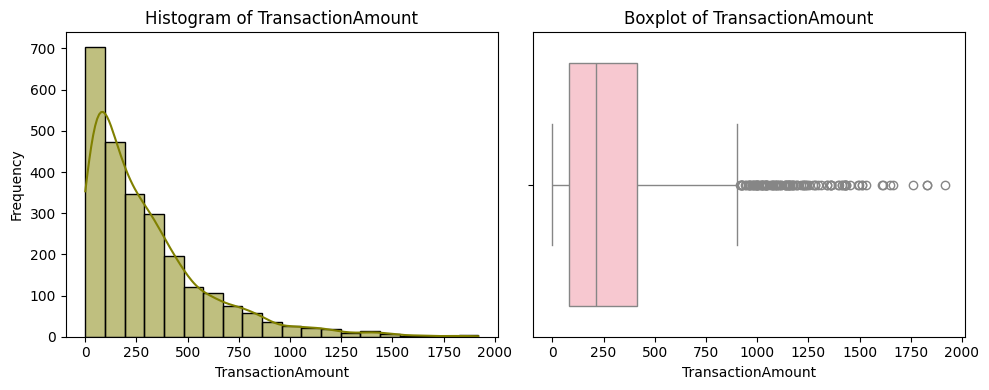

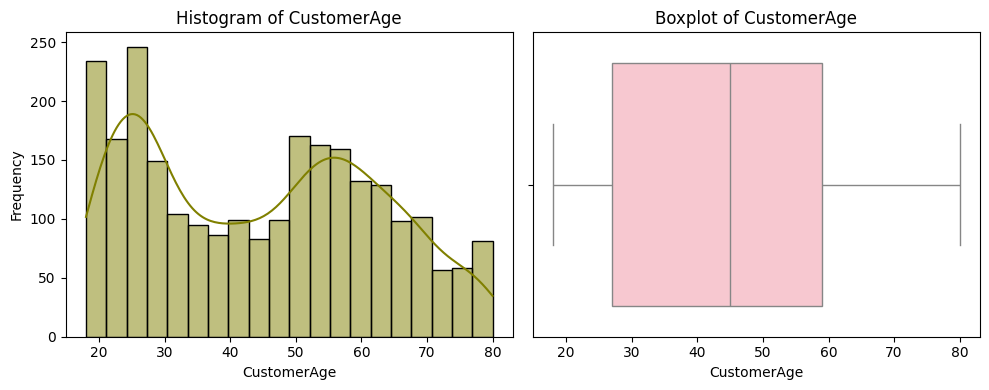

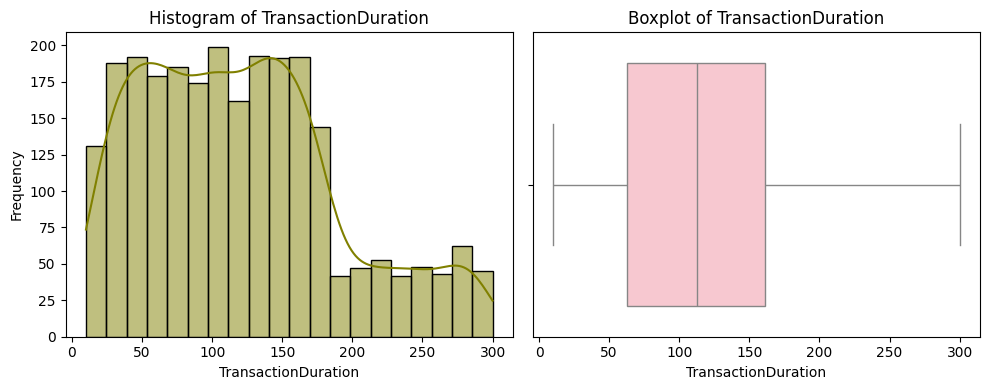

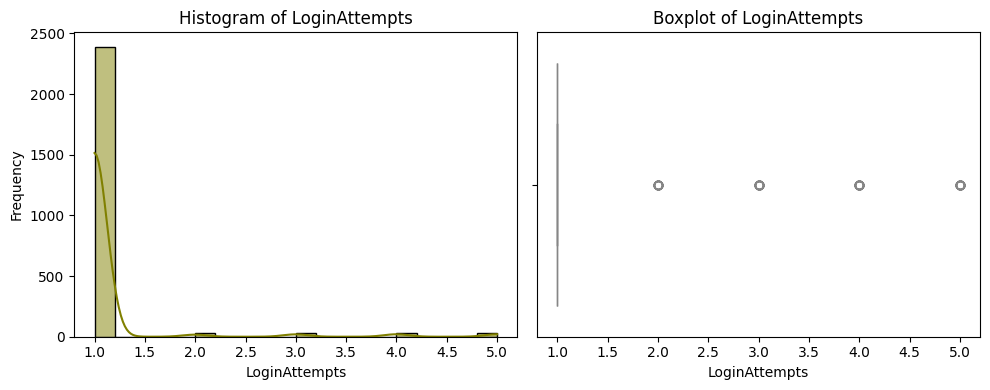

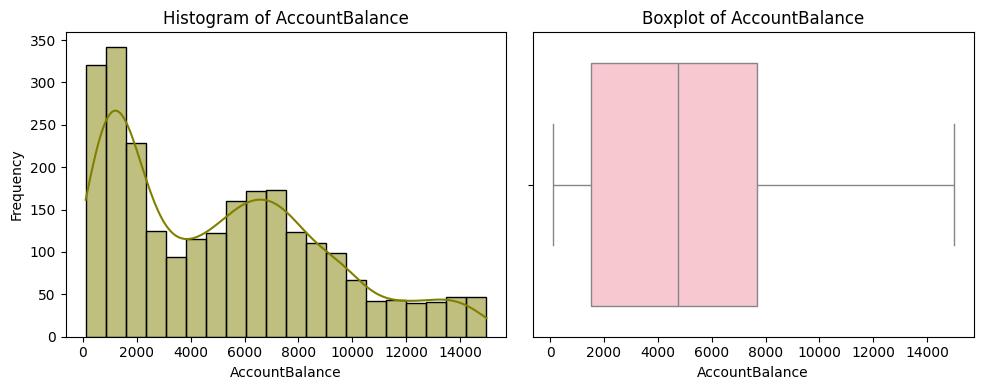

Index(['TransactionID', 'AccountID', 'TransactionType', 'Location', 'DeviceID',
       'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation'],
      dtype='object')


In [95]:
#understanding the distribution, variation and central tendency of a single feature at a time by doing univariate analysis

num_data = data.select_dtypes(include=['float64', 'int64'])

#seperating columns into numeric and categorical columns, numeric column is already initialized
cat_columns = data.select_dtypes(include=['object', 'category']).columns

#comparision between histograms and box plots for numeric columns
for col in num_columns:
    plt.figure(figsize=(10,4))
    #histogram
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True, bins=20, color='olive', edgecolor='black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    #boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col], color='pink')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

print(cat_columns)

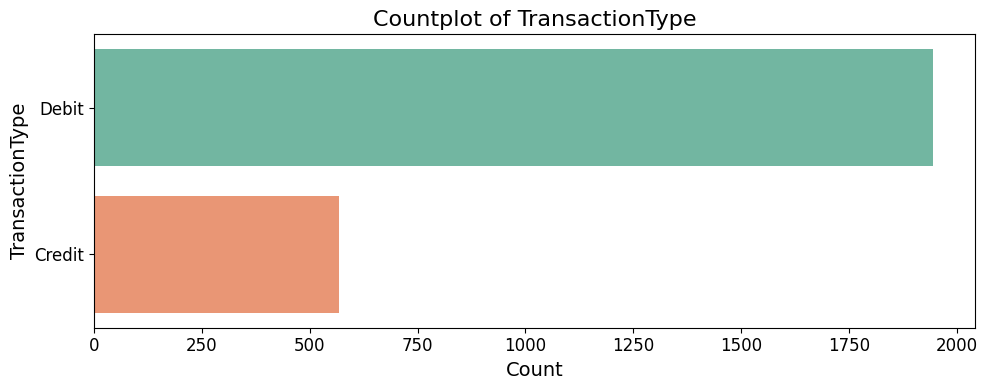

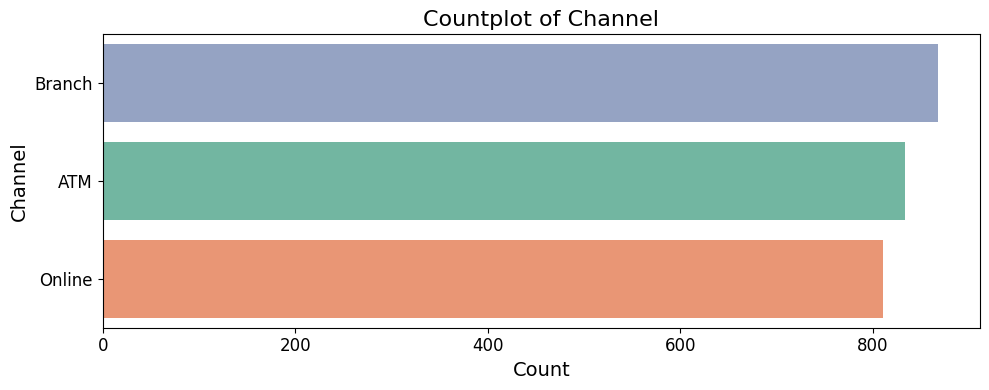

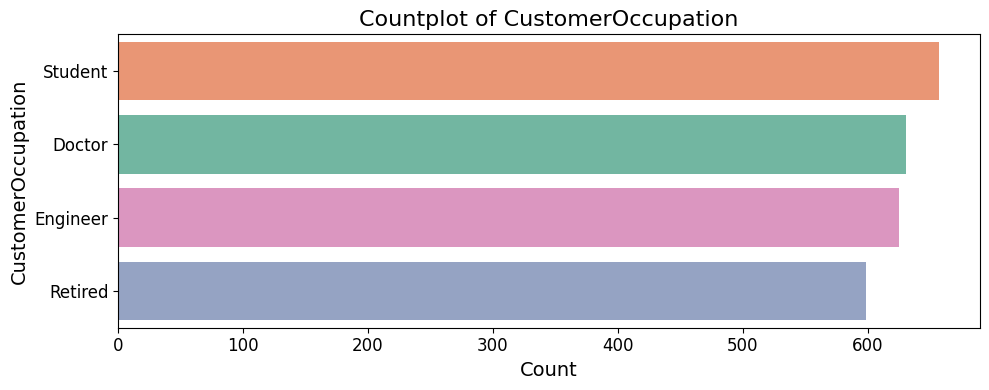

In [96]:
#countplot for  specific categorical columns
specific_columns = ['TransactionType', 'Channel', 'CustomerOccupation']
for col in specific_columns:
    plt.figure(figsize=(10, 4))
    value_counts = data[col].value_counts()
    sns.countplot(y=data[col], order=value_counts.index, hue=data[col], palette='Set2')
    plt.title(f'Countplot of {col}', fontsize=16)
    plt.xlabel('Count', fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

Correlation Matrix:
                     TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


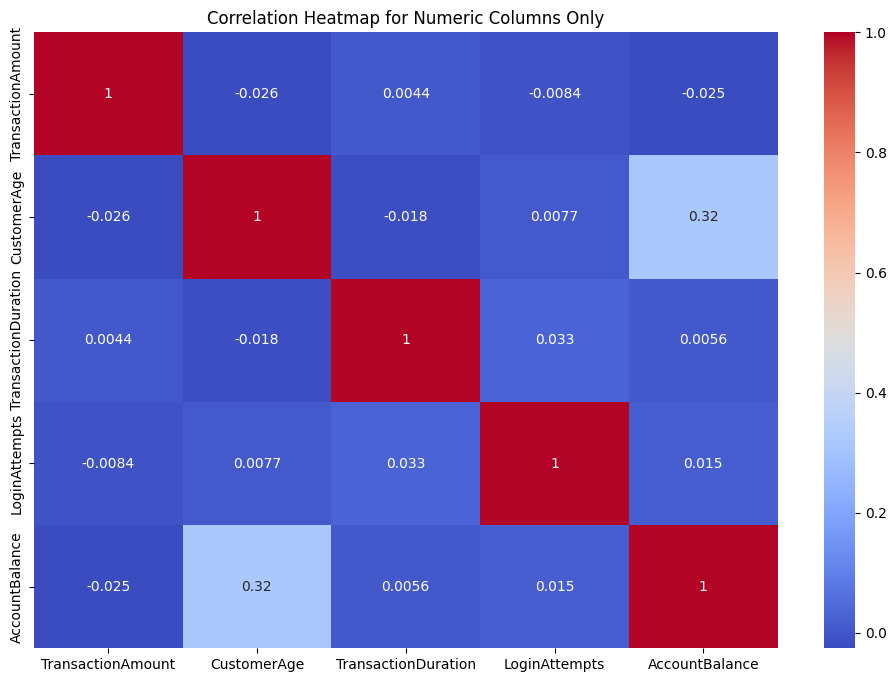

<Figure size 1200x800 with 0 Axes>

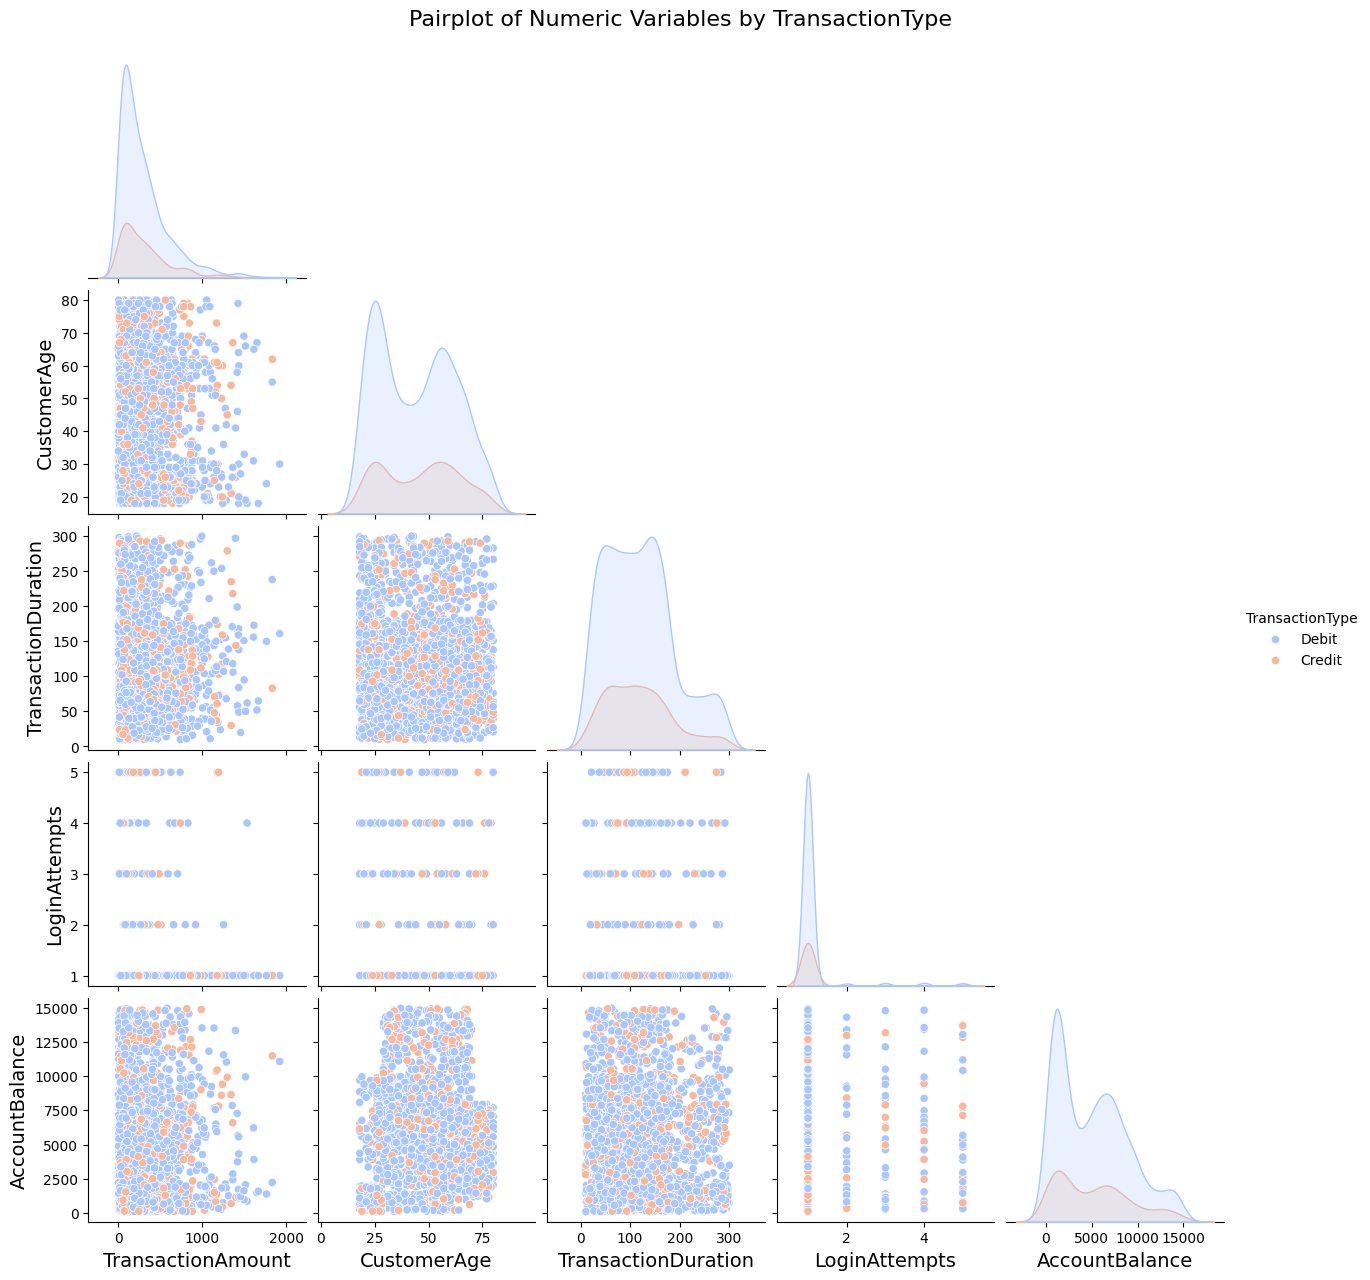

In [97]:
#bivariate and multivariate analysis

#correlation matrix for the numeric columns
correlation_mat = num_data.corr()
print("Correlation Matrix:")
print(correlation_mat)

#heatmap for numeric columns
plt.figure(figsize=(12,8))
sns.heatmap(correlation_mat, annot = True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numeric Columns Only')
plt.show()

#multivariate paiplot of numeric variables coloured by transaction type
plt.figure(figsize=(12,8))
g = sns.pairplot(data, vars=num_columns, hue='TransactionType', palette='coolwarm', corner=True, diag_kind='kde')
for ax in g.axes.flat:
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=14) 
        ax.set_ylabel(ax.get_ylabel(), fontsize=14)
        # ax.tick_params(labelsize=12) 

g.figure.suptitle('Pairplot of Numeric Variables by TransactionType', fontsize=16, y=1.02)
plt.show()


In [98]:
#fraud detection

#normalizing and preprocessing data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from scipy.cluster.hierarchy import linkage, fcluster
from datetime import datetime

#converting date-time columns from string to date time format
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'],format='%Y-%m-%d %H:%M:%S')
data['PreviousTransactionDate'] = pd.to_datetime(data['PreviousTransactionDate'],format='%Y-%m-%d %H:%M:%S')
data['TimeSinceLastTransaction'] = (data['TransactionDate'] - data['PreviousTransactionDate']).dt.total_seconds()

#segregating numeric and categorical colmuns
numeric_columns = ['TransactionAmount', 'TransactionDuration', 'LoginAttempts', 'AccountBalance', 'CustomerAge', 'TimeSinceLastTransaction']
categorical_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']

#normalizing numeric columns
scaler = StandardScaler()
scaled_numeric = pd.DataFrame(scaler.fit_transform(data[numeric_columns]), columns=numeric_columns)

#encoding categorical columns  and dropping the first variable to avoid the dummy variable trao i.e, making the variables linearly independent to get a unique solution
encode = OneHotEncoder(sparse_output=False, drop='first')  #avoiding dummy variable trap
encoded_categorical = pd.DataFrame(encode.fit_transform(data[categorical_columns]), columns=encode.get_feature_names_out(categorical_columns))

#combining the scaled and encoded data
final_processed = pd.concat([scaled_numeric, encoded_categorical], axis=1)

#initializing target fraud column
data['Fraud'] = False

#calculating statistics:
print("Statistics:")
print(data[numeric_columns].describe())


Statistics:
       TransactionAmount  TransactionDuration  LoginAttempts  AccountBalance  \
count        2512.000000          2512.000000    2512.000000     2512.000000   
mean          297.593778           119.643312       1.124602     5114.302966   
std           291.946243            69.963757       0.602662     3900.942499   
min             0.260000            10.000000       1.000000      101.250000   
25%            81.885000            63.000000       1.000000     1504.370000   
50%           211.140000           112.500000       1.000000     4735.510000   
75%           414.527500           161.000000       1.000000     7678.820000   
max          1919.110000           300.000000       5.000000    14977.990000   

       CustomerAge  TimeSinceLastTransaction  
count  2512.000000              2.512000e+03  
mean     44.673965             -4.211863e+07  
std      17.792198              9.191205e+06  
min      18.000000             -5.803267e+07  
25%      27.000000             -

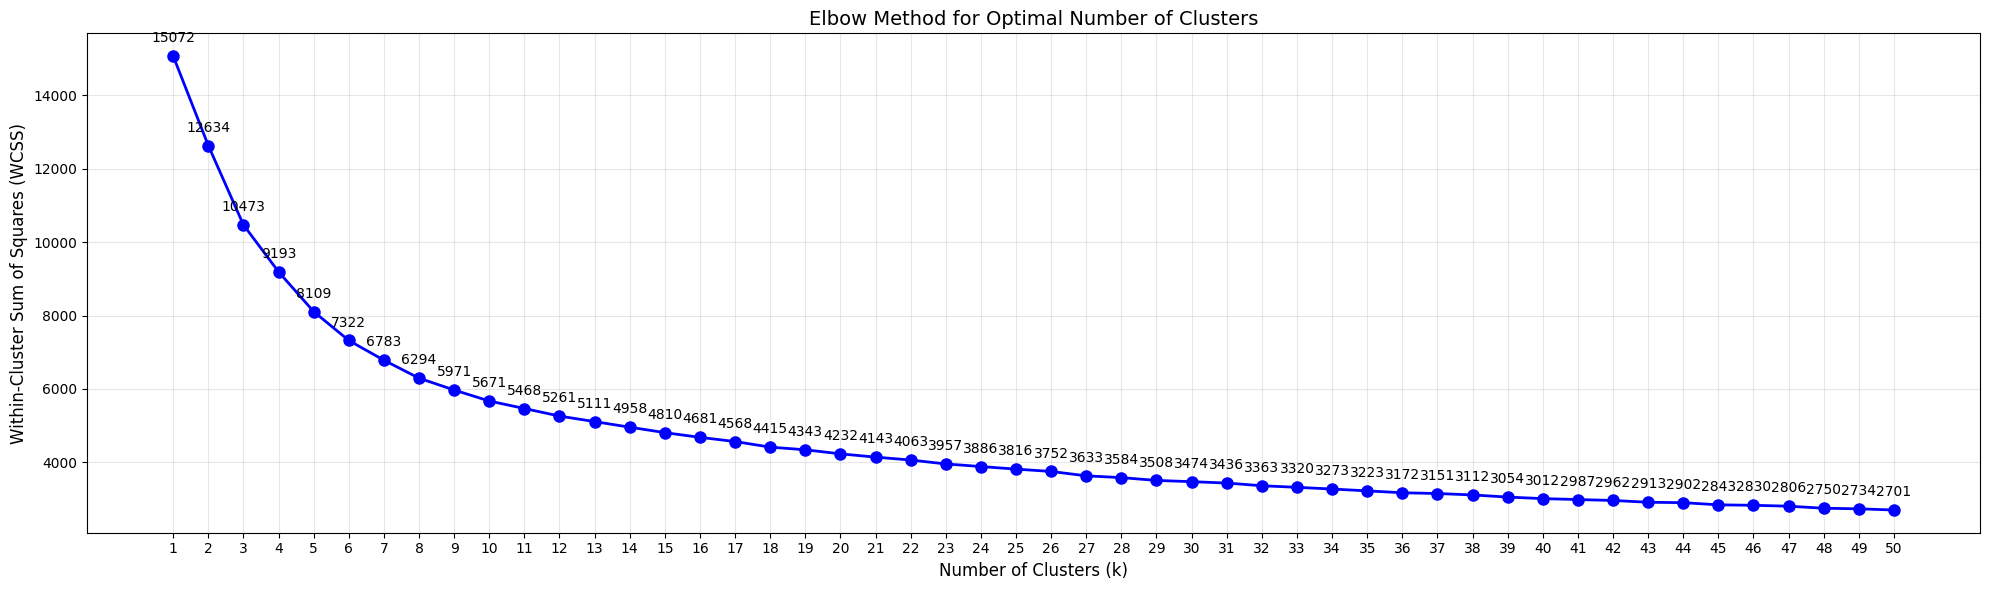

In [99]:
#we use multiple unsupervised learning algorithms to detect the anomalies

#k-mean clustering
from sklearn.cluster import KMeans 

#already standardized numeric columns
#we use the elbow method to find the optimal number of clusters for k-means

def plot_elbow_method(X, max_clusters=50):
    inertias = []
    K_range = range(1, max_clusters + 1)

    #calculating wcss for different number of clusters
    for k in K_range:
        kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
        kmeans.fit(X)
        inertias.append(kmeans.inertia_)

    #to plot the elbow graph
    plt.figure(figsize=(20, 6))
    plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
    plt.xlabel('Number of Clusters (k)', fontsize=12)
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=12)
    plt.title('Elbow Method for Optimal Number of Clusters', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xticks(K_range)

    for i, inertia in enumerate(inertias):
        plt.annotate(f'{inertia:.0f}', (K_range[i], inertia),
                    textcoords="offset points", xytext=(0,10), ha='center')

    plt.tight_layout()
    plt.show()

    return inertias, K_range

inertias, k_range = plot_elbow_method(scaled_numeric)

Threshold: 3.2032504263743764
Fraud Summary:
KMeans_Fraud
False    2489
True       23
Name: count, dtype: int64
Sample data:
   TransactionAmount  KMeans_Distance  KMeans_Fraud
0              14.09         1.281076         False
1             376.24         2.256964         False
2             126.29         0.836365         False
3             184.50         1.934314         False
4              13.45         1.790753         False


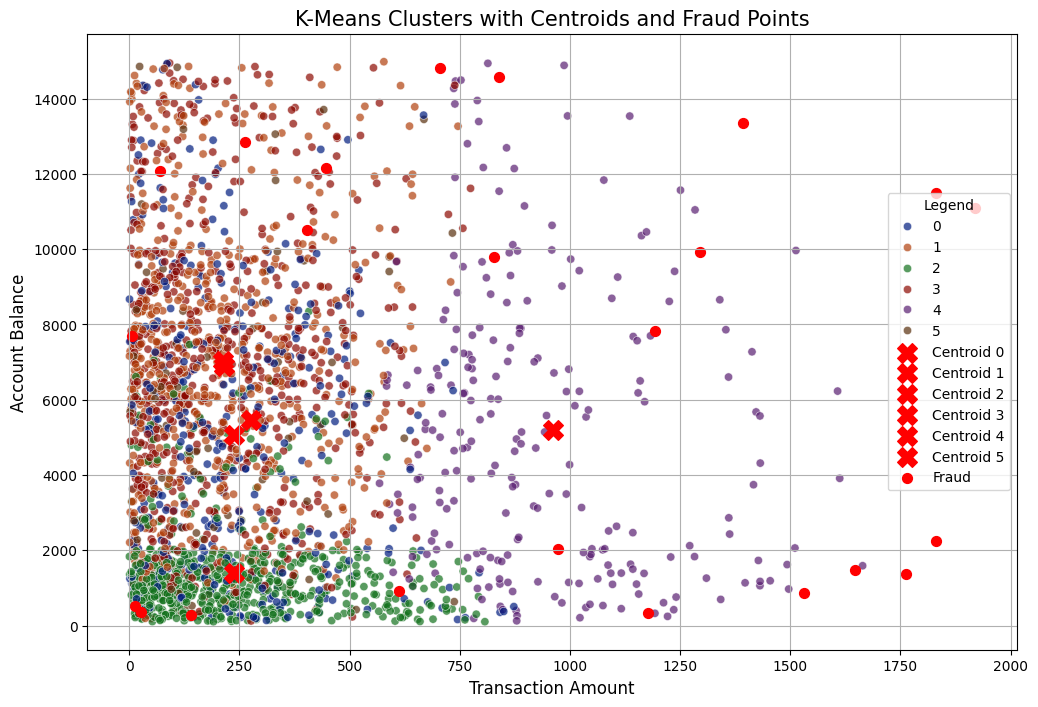

Total Fraudulent Transactions Detected using K-Means clustering: 23
Fraudulent transactions saved to: /home/diya/personal/work/projects/bank-fraud-detection/fraud_detections_kmeans.csv


In [100]:
#from the above figure we can see that the elbow method gives us an optimal number of clusters to be = 6

n_clusters = 6
k_means = KMeans(n_clusters=n_clusters, random_state=0)
k_means_labels = k_means.fit_predict(scaled_numeric)
data['KMeans_Cluster'] = k_means_labels

#calculating distance form the cnetroids
centroids = k_means.cluster_centers_
distances = np.linalg.norm(scaled_numeric.values - centroids[k_means_labels], axis=1)
data['KMeans_Distance'] = distances

#we set the fraud detection threshold to be any point which is has a distance greater than x = mean + 3(std) from its centroid (the 3 sigma rule)
threshold = distances.mean() + 3 * distances.std()
data['KMeans_Fraud'] = distances > threshold
data['Fraud'] = distances > threshold

fraud_summary = data['KMeans_Fraud'].value_counts()
print(f"Threshold: {threshold}")
print(f"Fraud Summary:\n{fraud_summary}")
print(f"Sample data:\n{data[['TransactionAmount', 'KMeans_Distance', 'KMeans_Fraud']].head()}")

#scaling back the centroids to original feature scale for plotting
centroids_scaled = k_means.cluster_centers_
centroids_original = scaler.inverse_transform(centroids_scaled)


#kmeans scatter plot for transaction amount and account balance features
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['TransactionAmount'],
    y=data['AccountBalance'],
    hue=data['KMeans_Cluster'],
    palette='dark',
    alpha=0.7,
    legend='full'
)

#highlighting the centroids and the fraud points in the plot
for i, centroid in enumerate(centroids_original):
    plt.scatter(
        centroid[numeric_columns.index('TransactionAmount')],
        centroid[numeric_columns.index('AccountBalance')],
        color='red',
        marker='X',
        s=200,
        label=f'Centroid {i}'
    )

fraud_points = data[data['KMeans_Fraud']]
plt.scatter(
    fraud_points['TransactionAmount'],
    fraud_points['AccountBalance'],
    color='red',
    marker='o',
    s=50,
    label='Fraud'
)

plt.title('K-Means Clusters with Centroids and Fraud Points', fontsize=15)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Account Balance', fontsize=12)
plt.legend(title='Legend', fontsize=10)
plt.grid(True)
plt.show()


#number of fraud points detected
total_fraud_points = data['KMeans_Fraud'].sum()
print(f"Total Fraudulent Transactions Detected using K-Means clustering: {total_fraud_points}")
# Save fraud transactions to a separate CSV file
fraud_output_path = '/home/diya/personal/work/projects/bank-fraud-detection/fraud_detections_kmeans.csv'
fraud_points.to_csv(fraud_output_path, index=False)
print(f"Fraudulent transactions saved to: {fraud_output_path}")



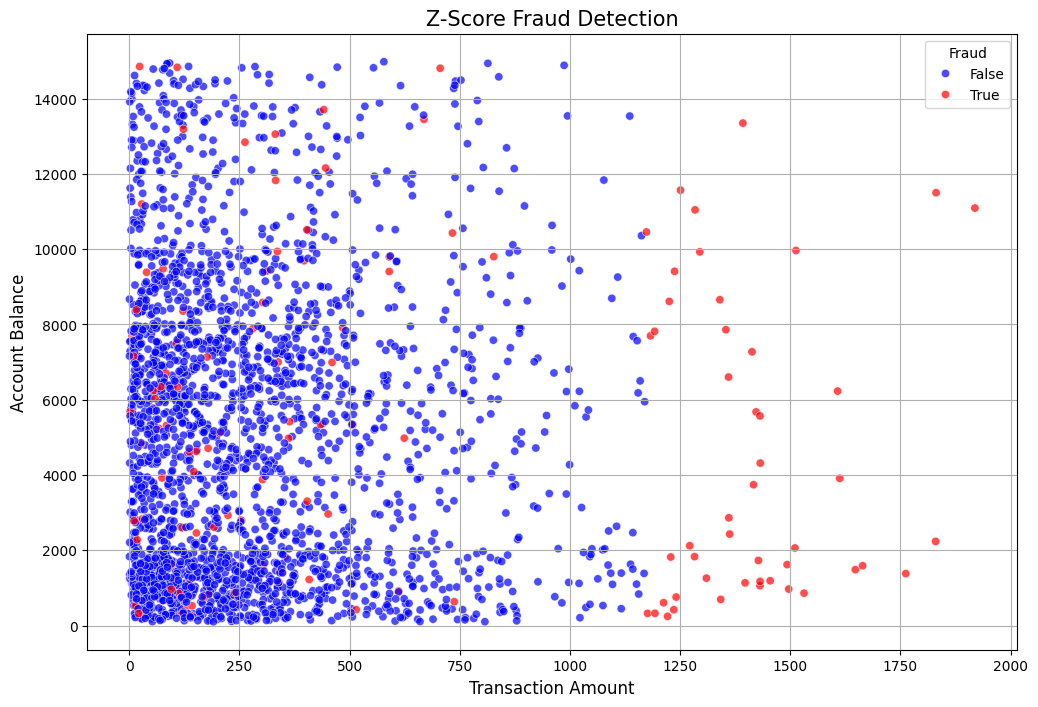

Total Fraudulent Transactions Detected by Z-Score Analysis: 140
Fraudulent transactions saved to: /home/diya/personal/work/projects/bank-fraud-detection/fraud_detection_zscore.csv


In [101]:
#detecting anomalies using z-score analysis

from scipy.stats import zscore

#calculate z-scores
z_score = np.abs(zscore(data[numeric_columns]))
#setting fraud detection threshold to be points where any feature exceeds |z|>3
data['ZScore_Fraud'] = (z_score > 3).any(axis=1)  
zscore_fraud_points = data[data['ZScore_Fraud']]

#total fraud points
total_zscore_fraud_points = data['ZScore_Fraud'].sum()
#updating the Fraud Column to include z-score detected fraud points using bitwise OR
data['Fraud'] |= data['ZScore_Fraud']

#scatter plot for z-score fraud
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['TransactionAmount'],
    y=data['AccountBalance'],
    hue=data['ZScore_Fraud'],
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.title('Z-Score Fraud Detection', fontsize=15)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Account Balance', fontsize=12)
plt.legend(title='Fraud', fontsize=10)
plt.grid(True)
plt.show()

#save fraudulent transactions detected by Z-Score analysis in a csv file
zscore_fraud_output_path = '/home/diya/personal/work/projects/bank-fraud-detection/fraud_detection_zscore.csv'
zscore_fraud_points.to_csv(zscore_fraud_output_path, index=False)

print(f"Total Fraudulent Transactions Detected by Z-Score Analysis: {total_zscore_fraud_points}")
print(f"Fraudulent transactions saved to: {zscore_fraud_output_path}")


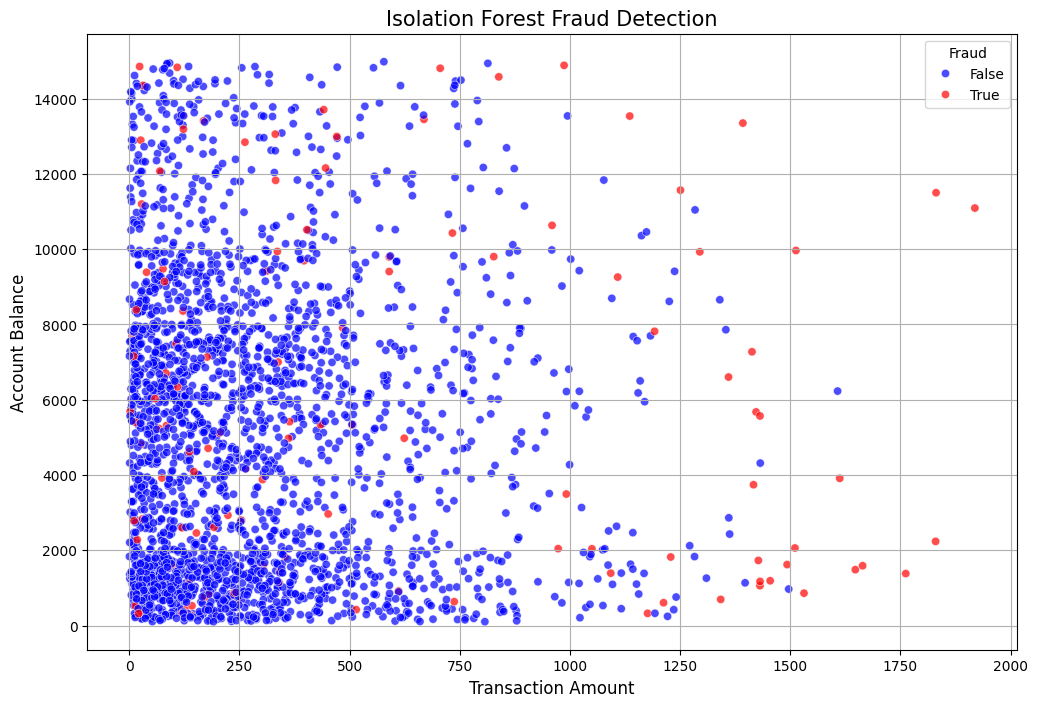

Total Fraudulent Transactions Detected using Isolation Forest: 126
Fraudulent transactions saved to: /home/diya/personal/work/projects/bank-fraud-detection/fraud_detection_forest.csv


In [102]:
#detecting anomalies using isolation forest
from sklearn.ensemble import IsolationForest

#assuming the contamination percentage using to be 5%
isolation_forest = IsolationForest(contamination=0.05, random_state=0)
isolation_forest.fit(scaled_numeric)

#predicting anomalies
data['IsoForest_Score'] = isolation_forest.decision_function(scaled_numeric)
#set true for fraud and false for normal transactions
data['IsoForest_Fraud'] = isolation_forest.predict(scaled_numeric) == -1

forest_fraud_points = data[data['IsoForest_Fraud']]
total_forest_fraud_points = data['IsoForest_Fraud'].sum()

#updating the Fraud Column to include forest detected fraud points using bitwise OR
data['Fraud'] |= data['IsoForest_Fraud']

#scatter plot for isolation forest
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['TransactionAmount'],
    y=data['AccountBalance'],
    hue=data['IsoForest_Fraud'],
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.title('Isolation Forest Fraud Detection', fontsize=15)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Account Balance', fontsize=12)
plt.legend(title='Fraud', fontsize=10)
plt.grid(True)
plt.show()

#save fraudulent transactions detected by Isolation Forest analysis in a csv file
fraud_output_path = '/home/diya/personal/work/projects/bank-fraud-detection/fraud_detection_forest.csv'
forest_fraud_points.to_csv(fraud_output_path, index=False)

print(f"Total Fraudulent Transactions Detected using Isolation Forest: {total_forest_fraud_points}")
print(f"Fraudulent transactions saved to: {fraud_output_path}")

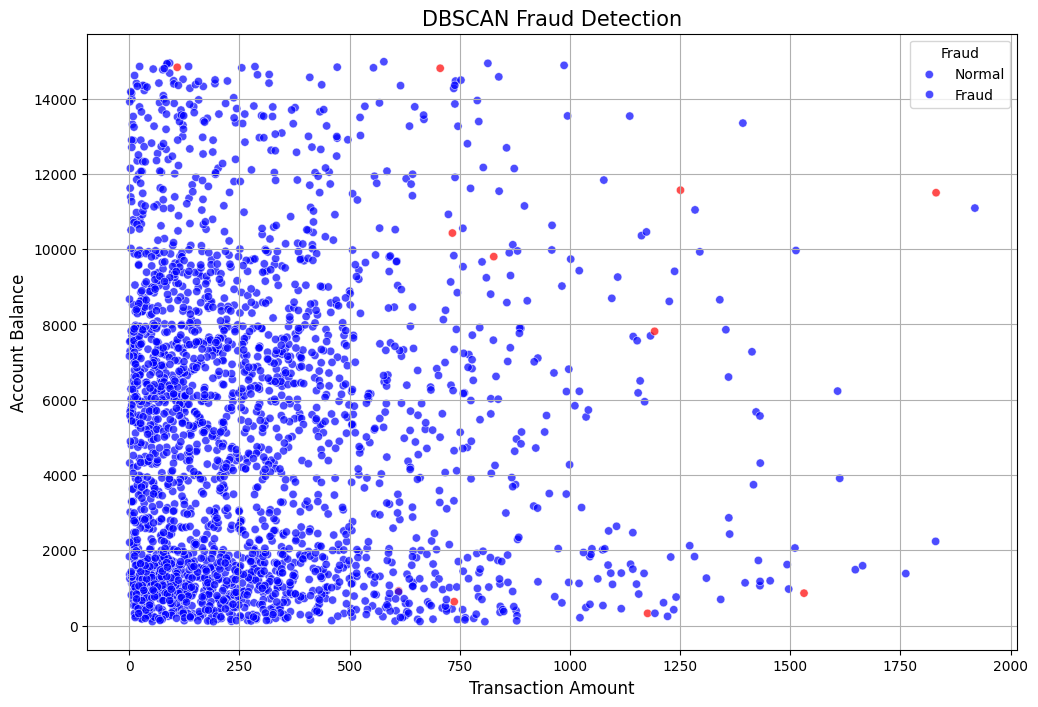

Total Fraudulent Transactions Detected by DBSCAN: 11
Fraudulent transactions saved to: /home/diya/personal/work/projects/bank-fraud-detection/fraud_detection_dbscan.csv


In [103]:
#anomaly detection using Density-Based Spatial Clustering of Applications with Noise (DBSCAN) Analysis

from sklearn.cluster import DBSCAN

#keeping the default values of eps = 0.5 and min_samples = 5
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_cluster = dbscan.fit_predict(scaled_numeric)
data['DBSCAN_Cluster'] = dbscan_cluster
#true indicates fraud and false indicates normal points belonging to clusters
data['DBSCAN_Fraud'] = data['DBSCAN_Cluster'] == -1

#extracting fraud points
dbscan_fraud_points = data[data['DBSCAN_Fraud']]
total_dbscan_fraud_points = data['DBSCAN_Fraud'].sum()

#updating the Fraud Column to include dbscan detected fraud points using bitwise OR
data['Fraud'] |= data['DBSCAN_Fraud']

#scatter plot for dbscan analysis
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=data['TransactionAmount'],
    y=data['AccountBalance'],
    hue=data['DBSCAN_Fraud'],
    palette={True: 'red', False: 'blue'},
    alpha=0.7
)
plt.title('DBSCAN Fraud Detection', fontsize=15)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Account Balance', fontsize=12)
plt.legend(title='Fraud', labels=['Normal', 'Fraud'], fontsize=10)
plt.grid(True)
plt.show()

#save fraudulent transactions detected by dbscan analysis in a csv file
dbscan_fraud_output_path = '/home/diya/personal/work/projects/bank-fraud-detection/fraud_detection_dbscan.csv'
dbscan_fraud_points.to_csv(dbscan_fraud_output_path, index=False)

print(f"Total Fraudulent Transactions Detected by DBSCAN: {total_dbscan_fraud_points}")
print(f"Fraudulent transactions saved to: {dbscan_fraud_output_path}")

Total Fraudulent Transactions Detected: 157


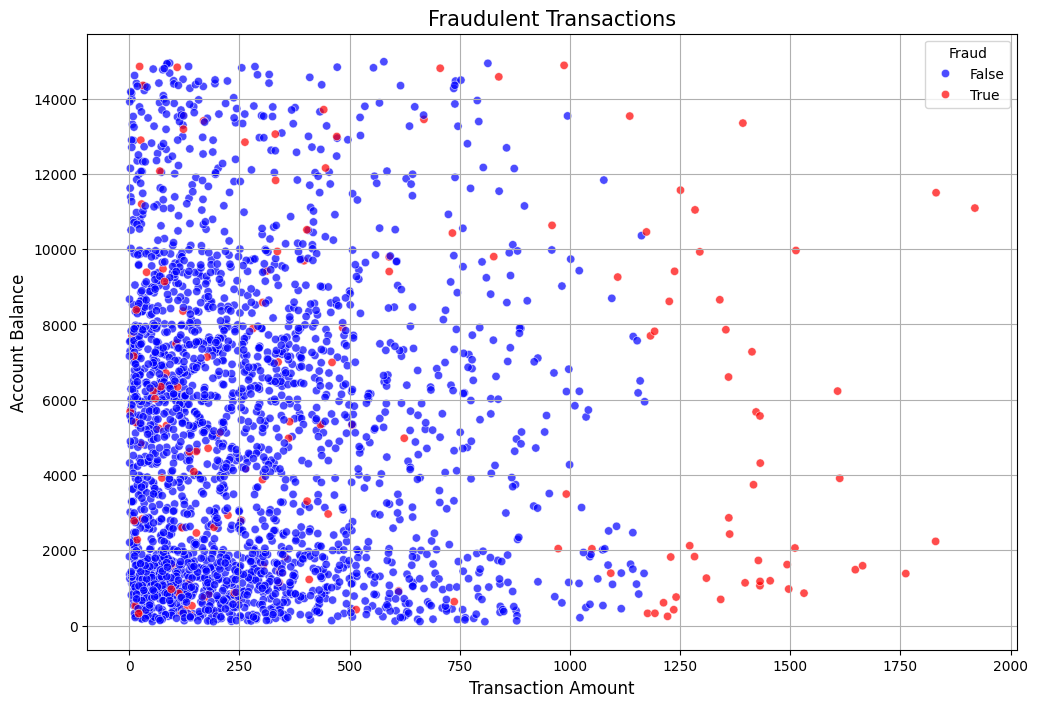

Total Fraudulent Transactions Detected: 157
Fraudulent transactions saved to: /home/diya/personal/work/projects/bank-fraud-detection/fraud_detection_total.csv


In [104]:
#union of fraud points from each of the unsupervised learning algorithms

print(f"Total Fraudulent Transactions Detected: {data['Fraud'].sum()}")

#visulaizing total fraud points
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='TransactionAmount', 
    y='AccountBalance', 
    hue='Fraud', 
    data=data, 
    palette={True: 'red', False: 'blue'}, 
    alpha=0.7
)
plt.title('Fraudulent Transactions', fontsize=15)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Account Balance', fontsize=12)
plt.legend(title='Fraud', fontsize=10)
plt.grid(True)
plt.show()

#save total fraudulent transactions in a csv file
output_path = '/home/diya/personal/work/projects/bank-fraud-detection/fraud_detection_total.csv'
data.to_csv(output_path, index=False)

fraud = data[data['Fraud'] == True]
total_fraud = data['Fraud'].sum()

print(f"Total Fraudulent Transactions Detected: {total_fraud}")
print(f"Fraudulent transactions saved to: {output_path}")